In [2]:
import os
import warnings
import scipy.io as sio
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed
from keras.layers import LSTM, Dense, Convolution1D
import time
import random
import string
import nilib as ni
import numpy as np

Using TensorFlow backend.


In [3]:
base_dir = '/Users/Near/Desktop/mask/'

In [4]:
train_list = ni.prep_CHiME2_lists(base_dir, mask_type='ideal_amplitude')

In [5]:
noisy = sio.loadmat(train_list[1])['data'][0][0][0]
clean = sio.loadmat(train_list[1])['data'][0][0][1]
mask = sio.loadmat(train_list[1])['data'][0][0][2]
mask = mask.swapaxes(0,1)
clean = clean.swapaxes(0,1)
noisy = noisy.swapaxes(0,1)
clean.shape
frame_num, freq_num = mask.shape
print freq_num,frame_num
amount_to_pad = 50 - (frame_num % 50)
mask = np.pad(mask, ((0,amount_to_pad),(0,0)), 'wrap')
# convert spectrogam values to decibel from complex
clean = np.pad(20.0*np.log10(abs(clean)), ((0,amount_to_pad),(0,0)), 'wrap')
noisy = np.pad(20.0 * np.log10(abs(noisy)), ((0, amount_to_pad), (0, 0)), 'wrap')
# normalize per spect batch (per .mat file)
clean /= np.max(abs(clean))
noisy /= np.max(abs(noisy))
# -1 allows for automatic dimension calculation
clean = clean.reshape(-1, 50, 513)
noisy = noisy.reshape(-1, 50, 513)
temp_keras_targets = np.concatenate((clean,noisy),axis = 2)
temp_keras_inputs = noisy.reshape(-1, 50, 513)
clean[0]

513 51


array([[-0.23263048, -0.250164  , -0.31533852, ..., -0.69502246,
        -0.68383515, -0.68505615],
       [-0.49686146, -0.22700961, -0.21457531, ..., -0.5467456 ,
        -0.55818731, -0.54359138],
       [-0.16029759, -0.17443706, -0.20519666, ..., -0.57652736,
        -0.65000421, -0.54240787],
       ..., 
       [-0.15691344, -0.17698659, -0.23695874, ..., -0.62459123,
        -0.62885141, -0.63421029],
       [-0.43841246, -0.30652517, -0.29132578, ..., -0.68157881,
        -0.69716471, -0.63673794],
       [-0.17832261, -0.19771504, -0.26245198, ..., -0.67940634,
        -0.73123056, -0.70469177]], dtype=float32)

513 39
(50, 513)


NameError: name 'features' is not defined

In [ ]:
print "Building model: input->LSTM:1024->Dense:513=output :: optimizer=RMSprop,loss=binary_crossentropy"
# define sequential model
model = Sequential()
# the 1st LSTM layer
model.add(LSTM(input_dim=513, input_length=None, output_dim=1024, return_sequences=True))
# output layer
model.add(TimeDistributed(Dense(output_dim=513)))
model.compile(optimizer='RMSprop', loss='binary_crossentropy')

In [11]:
pred = np.load('pred.npy')
true = np.load('true.npy')

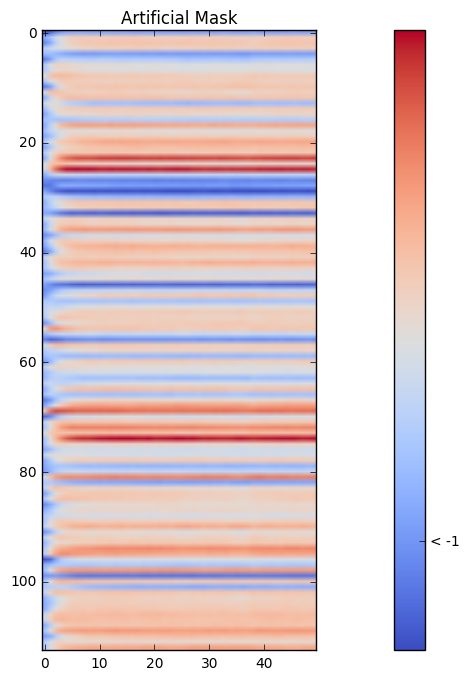

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.rcParams['figure.figsize'] = (20.0, 8.0) #adjust to your screen
###### cell 2
# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()
cax = ax.imshow(np.transpose(pred[0,:, 100:213]), cmap=cm.coolwarm)
ax.set_title('Artificial Mask');
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

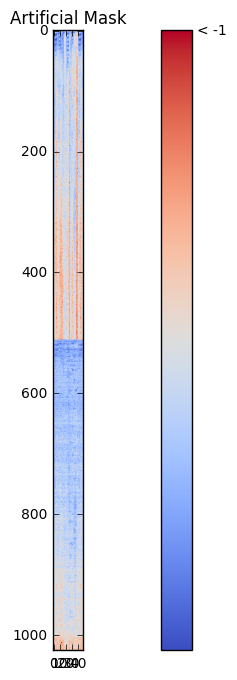

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.rcParams['figure.figsize'] = (20.0, 8.0) #adjust to your screen
###### cell 2
# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()
cax = ax.imshow(np.transpose(true[0,:, :]), cmap=cm.coolwarm)
ax.set_title('Artificial Mask');
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

In [30]:
ls

pred.npy                          run_0000_model_weights.h5
run_0000_keras_history.txt        true.npy
run_0000_model_architecture.json
